# Netflix Movies

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions. This data does contain null values and some outliers, but handling these is out of scope for the project. Feel free to experiment after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the CSV file and store as netflix_df.

netflix_df = pd.read_csv(r'C:\Users\nene0\OneDrive\바탕 화면\Python Learning\Datacamp\1_Netflix_Movies\netflix_data.csv')

netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [4]:
print(netflix_df.shape)

(7787, 11)


In [5]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB


In [6]:
# Filter the data to remove TV shows and store as netflix_subset.

netflix_df['type'].value_counts()

type
Movie      5377
TV Show    2410
Name: count, dtype: int64

In [7]:
netflix_subset = netflix_df[netflix_df['type']=='Movie']

netflix_subset.reset_index(drop=True, inplace=True)

netflix_subset.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


In [8]:
print(netflix_subset.shape)

(5377, 11)


In [9]:
netflix_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5377 entries, 0 to 5376
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5377 non-null   object
 1   type          5377 non-null   object
 2   title         5377 non-null   object
 3   director      5214 non-null   object
 4   cast          4951 non-null   object
 5   country       5147 non-null   object
 6   date_added    5377 non-null   object
 7   release_year  5377 non-null   int64 
 8   duration      5377 non-null   int64 
 9   description   5377 non-null   object
 10  genre         5377 non-null   object
dtypes: int64(2), object(9)
memory usage: 462.2+ KB


In [10]:
# Investigate and subset the Netflix movie data, keeping only the columns "title", "country", "genre", "release_year", "duration",
# and saving this into a new DataFrame called netflix_movies.

netflix_movies = netflix_subset[['title','country','genre','release_year','duration']]
netflix_movies.head()

,title,country,genre,release_year,duration
0,7:19,Mexico,Dramas,2016,93
1,23:59,Singapore,Horror Movies,2011,78
2,9,United States,Action,2009,80
3,21,United States,Dramas,2008,123
4,122,Egypt,Horror Movies,2019,95


In [12]:
# Filter netflix_movies to find the movies that are strictly shorter than 60 minutes, saving the resulting DataFrame as short_movies;
# inspect the result to find possible contributing factors.

short_movies = netflix_movies[netflix_movies['duration'] < 60]

short_movies.reset_index(drop=True, inplace=True)
short_movies.head(10)

,title,country,genre,release_year,duration
0,#Rucker50,United States,Documentaries,2016,56
1,100 Things to do Before High School,United States,Uncategorized,2014,44
2,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
3,3 Seconds Divorce,Canada,Documentaries,2018,53
4,A 3 Minute Hug,Mexico,Documentaries,2019,28
5,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
6,A Family Reunion Christmas,United States,Uncategorized,2019,29
7,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
8,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
9,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


In [13]:
short_movies['genre'].value_counts()

genre
Documentaries           151
Children                107
Stand-Up                 72
Uncategorized            40
Comedies                 15
Dramas                   12
Classic Movies            8
Action                    6
International Movies      3
Anime Features            3
Music                     2
Horror Movies             1
Name: count, dtype: int64

Most short films fall into categories like documentaries, children's stories, and stand-up comedy. Documentaries are usually under an hour long because they aim to tell a story quickly and capture people's interest. Similarly, children's movies are also shorter since kids can only pay attention for a limited time.

In [28]:
# Using a for loop and if/elif statements, iterate through the rows of netflix_movies and assign colors of your choice to four genre groups
# ("Children", "Documentaries", "Stand-Up", and "Other" for everything else). Save the results in a colors list.
# Initialize a matplotlib figure object called fig and create a scatter plot for movie duration by release year using
# the colors list to color the points and using the labels "Release year" for the x-axis, "Duration (min)" for the y-axis,
# and the title "Movie Duration by Year of Release".

colors = []

for genre in netflix_movies['genre']:
    if genre == 'Children':
        colors.append('purple')
    elif genre == 'Documentaries':
        colors.append('green')
    elif genre == 'Stand-Up':
        colors.append('blue')
    else:
        colors.append('orange')

print(colors)

['orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'green', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'green', 'orange', 'green', 'green', 'orange', 'orange', 'orange', 'orange', 'green', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'green', 'orange', 'orange', 'green', 'orange', 'orange', 'orange', 'orange', 'orange', 'green', 'orange', 'orange', 'orange', 'green', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'green', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'green', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'green', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'green', 'purple', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'o

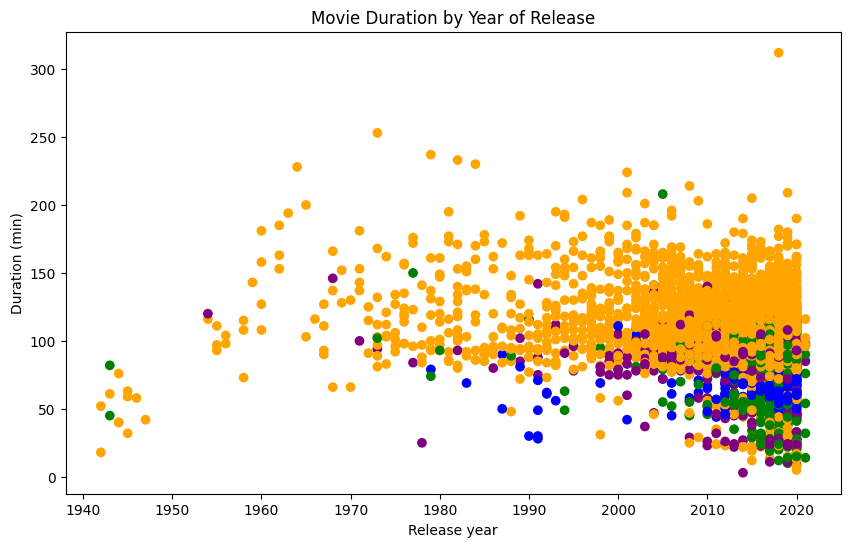

In [30]:
fig = plt.figure(figsize=(10, 6))

plt.scatter(netflix_movies['release_year'], netflix_movies['duration'], c=colors)
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title('Movie Duration by Year of Release')
plt.show()

In [32]:
# After inspecting the plot, answer the question
# "Are we certain that movies are getting shorter?" by assigning either "yes" or "no" to the variable answer.

answer = 'no'
print("Are we certain that movies are getting shorter?", answer)

Are we certain that movies are getting shorter? no


Looking at the scatter plot, it's not clear whether movies are getting shorter. What we do see is that there's been an increase in movie production since the 2000s, covering a wide range of genres.